In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit, differential_evolution
import csv
from data_read import data_read
from rebinning import rebinning
from fit import fit
from get_rates import get_rates
from get_bkg import get_bkg

In [2]:
file_name = './Data/Gamma data/Espectros/Bi207-D1.mca'

In [3]:
Nch = 8192

ch, rate, srate = get_rates(file_name)
rate_bkg, srate_bkg = get_bkg()


In [4]:
# plt.scatter(ch, rate, marker='+', c="black")
# plt.show()
# plt.scatter(ch, rate_bkg, marker='+', c="black")
# plt.show()
# plt.scatter(ch, rate, marker='+', c="black")
# plt.show()
# plt.scatter(ch, rate-rate_bkg, marker='+', c="black")
# plt.show()

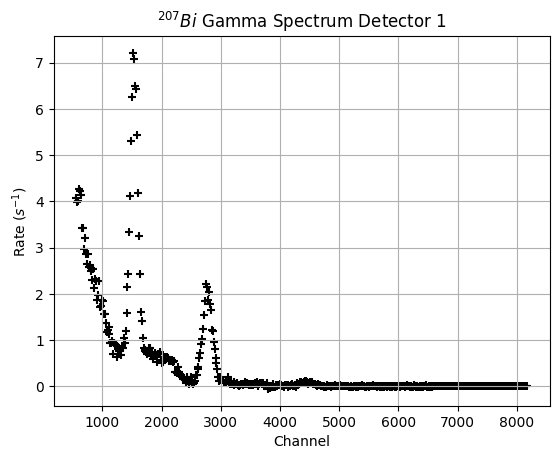

In [5]:
real_rate = rate - rate_bkg
sreal_rate = np.sqrt(srate**2+srate_bkg**2)
limInf = 35

plt.scatter(ch[limInf:], real_rate[limInf:],marker='+',c="black")
plt.title('$^{207} Bi$ Gamma Spectrum Detector 1')
plt.xlabel('Channel')
plt.ylabel('Rate ($s^{-1}$)')
plt.grid()
# plt.savefig('./Plots/Espectros/152Eu_D2.png')
plt.show()



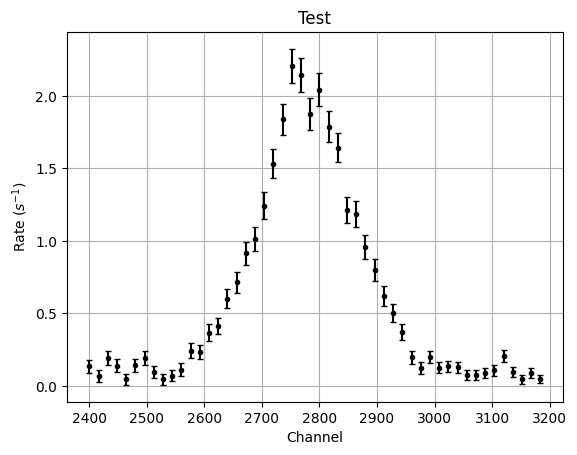

In [12]:
limMax = 200
limMin = 150


x = ch[limMin:limMax]
y = real_rate[limMin:limMax]
sy = sreal_rate[limMin:limMax]

plt.errorbar(x, y, yerr=sy,capsize=2,fmt='.',c="black")
plt.title('Test')
plt.xlabel('Channel')
plt.ylabel('Rate ($s^{-1}$)')
plt.grid()

plt.show()

In [13]:
def func(x,*p):
    return (p[0] + p[1]*x + p[2]*x**2 + p[3]*np.exp(-(1/2)*((x-p[4])/p[5])**2))
    

In [14]:
res_param, res_xi2, res_cov = fit(x,y,sy,func,[0,0,0,0.5,2800,10])

In [15]:
print(res_param)
print(res_xi2)

[-4.16542658e-01  3.96664510e-04 -7.56091277e-08  1.92015225e+00
  2.77805465e+03  8.03950073e+01]
1.3851807835292502


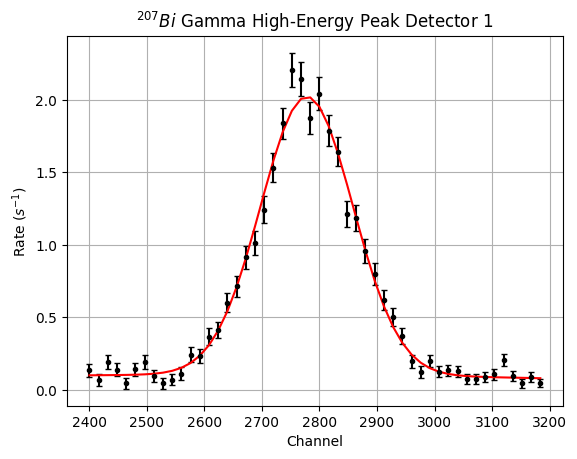

In [23]:
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Rate ($s^{-1}$)')
plt.title('$^{207} Bi$ Gamma High-Energy Peak Detector 1')
plt.errorbar(x, y, yerr=sy,capsize=2,fmt='.',c="black",label='Data')
plt.plot(x, func(x,*res_param), 'r-', label='Fit')
# plt.savefig('./Plots/Ajustes/207BiHighPeak_D1.png')
plt.show()

In [19]:
N = 3*2

In [20]:
for i in range(N):
    #print('p'+str(i)+' = '+str(res_param[i]))
    print(str(res_param[i]))

-0.4165426581171978
0.00039666451007281533
-7.560912771410351e-08
1.9201522545151983
2778.054652791741
80.39500726750587


In [21]:
for i in range(N):
    # print('s(p'+str(i)+') = '+str(np.sqrt(res_cov[i,i])))
    print(str(np.sqrt(res_cov[i,i])))

2.2803534807176065
0.001653369270008865
2.958836712036669e-07
0.052860204165562544
1.929712510684455
2.4480259755786187


In [22]:
print(res_xi2)

1.3851807835292502
